In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
class linear_regression:
    def __init__(self):
        self.co_ordinates:list[tuple[int, int]] = []
        self.y_intercept = None
        self.slope = None

    def plot_points(self):
        plt.scatter(*self.get_x_y())
        for x, y in zip(self.get_x_y()[0], self.get_x_y()[1]):
            plt.text(x - 0.5, y -0.8, f"{float(x), float(y)}")
        plt.title("Scatter plot of co_ordinates")
    
        plt.show()

    def plot_regression_line(self):
        plt.scatter(*self.get_x_y())
        plt.plot(*self.line_points())
        plt.grid()
        plt.title("Regression Line")
        plt.show()


    def add_co_ordinates(self, points:list[tuple[int, int]]):
        if type(points) is not list:
            raise ValueError(f"Expected argument of type list[tuple[int, int]] instead got {type(points)}")
        
        for element in points:
            if type(element) is not tuple or len(element) != 2:
                raise ValueError(f"Each point should be a tuple in the form (x, y)")
            if type(element[0]) is not int:
                raise ValueError(f"Co ordinates are supposed to be of type int")
            if type(element[1]) is not int:
                raise ValueError(f"Co ordinates are supposed to be of type int")
        if self.co_ordinates is not None:
            self.co_ordinates = []
        self.co_ordinates = self.co_ordinates + points

    def get_x_y(self):
        x = [num[0] for num in self.co_ordinates]
        x = np.array(x)
        y = [num[1] for num in self.co_ordinates]
        y = np.array(y)
        return x, y
    
    def sub_avg(self):
        x,y = self.get_x_y()
        x_avg, y_avg = np.mean(x), np.mean(y)
        x_x_avg = np.round(x-x_avg, 1)
        y_y_avg = np.round(y-y_avg, 1)
        return x_x_avg, y_y_avg
    
    def b_1(self):
        x, y = self.sub_avg()
        xy = np.round(x * y, 1)
        xx = np.round(x ** 2, 1)
        slope = np.round(np.sum(xy)/np.sum(xx), 2)
        self.slope = slope
        return slope
    
    def b_0(self):
        x_bar, y_bar = self.get_x_y()
        x_bar, y_bar = np.mean(x_bar), np.mean(y_bar)
        slope = self.b_1()
        b = y_bar - (slope * x_bar)
        self.y_intercept = np.round(b, 2)
        return b
    
    def line_points(self):
        x, _ = self.get_x_y()
        x = np.arange(np.min(x) - 5, np.max(x) + 5)
        y =  self.b_1() * x + self.b_0()
        return x, y
    
    def predict(self, x):
        return(np.round(self.slope * x + self.y_intercept, 2))

    def coef(self):
        print(f"y-intercept: {self.y_intercept}")
        print(f"slope: {self.slope}")

    def fit(self, x, y=None):
        if not x and not y:
            raise ValueError("Either pass list of x and list of y co_ordinates separately or pass a list of tuples containing co_ordinates")
        elif x and not y:
            self.add_co_ordinates(x)
        else:
            co_ordinates = [(x_main, y_main) for x_main, y_main in zip(x, y)]
            self.add_co_ordinates(co_ordinates)


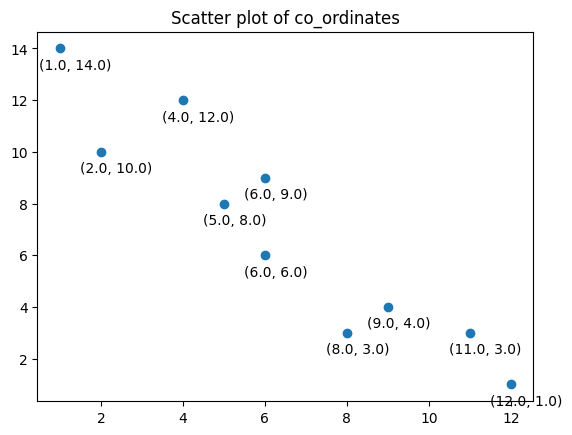

In [ ]:
my_model = linear_regression()
points: list[tuple[int, int]] = [
    (8, 3),
    (2, 10),
    (11, 3),
    (6, 6),
    (5, 8),
    (4, 12),
    (12, 1),
    (9, 4),
    (6, 9),
    (1, 14)
]
my_model.fit(points)

my_model.plot_points()


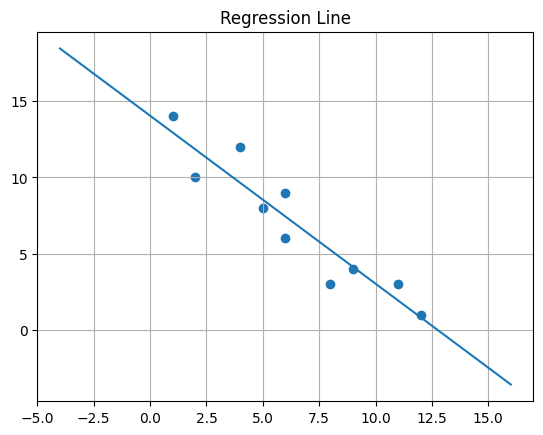

In [4]:
my_model.plot_regression_line()

In [5]:
my_model.predict(5)

np.float64(8.54)

In [6]:
my_model.coef()

y-intercept: 14.04
slope: -1.1


In [7]:
sk_model = LinearRegression()
x = [x for x in points[0]]
x = np.array(x).reshape(-1, 1)
y = [y for y in points[1]]
y = np.array(y).reshape(-1, 1)
sk_model.fit(x, y)

LinearRegression()

In [8]:
print(f"y-intercept: {sk_model.intercept_}")
print(f"slope: {sk_model.coef_}")

y-intercept: [14.8]
slope: [[-1.6]]


In [9]:
pred = np.array([5]).reshape(1, -1)
sk_model.predict(pred)

array([[6.8]])

In [10]:
import pandas as pd

In [11]:
mine = pd.DataFrame({"y-intercept": my_model.y_intercept, "slope": my_model.slope}, ["My Model"])
sk = pd.DataFrame({"y-intercept": sk_model.intercept_, "slope": sk_model.coef_[0]}, ["Scikit Learn"])
pd.concat([mine, sk])

,y-intercept,slope
My Model,14.04,-1.1
Scikit Learn,14.80,-1.6


In [12]:
x_pred = np.arange(20).reshape(-1, 1)
my_pred = my_model.predict(x_pred)
sk_pred = sk_model.predict(x_pred)

In [13]:
pd.DataFrame({"Values": x_pred.flatten(), "SKlearn's Prediction": sk_pred.flatten(), "My Model's Prediction": my_pred.flatten()})

,Values,SKlearn's Prediction,My Model's Prediction
0,0,14.8,14.04
1,1,13.2,12.94
2,2,11.6,11.84
3,3,10.0,10.74
4,4,8.4,9.64
5,5,6.8,8.54
6,6,5.2,7.44
7,7,3.6,6.34
8,8,2.0,5.24
9,9,0.4,4.14
